In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters define

In [148]:
params = {}
params['N_chain'] = 1001
params['N'] = params['N_chain'] + 1
params['t'] = 1
params['delta'] = 0.5
params['t_a'] = params['t'] + params['delta']
params['t_b'] = params['t'] - params['delta']
params['epsilon_d'] = 0.0
params['g'] = 1.0

# Define site vectors

In [149]:
site_vect = np.zeros([params['N'],params['N']])

for i in range(params['N']):
    site_vect[i] = np.zeros(params['N'])
    site_vect[i][i] = 1.0
print(site_vect)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# T shape isotropic chain

In [150]:
H_T_shape = np.zeros([params['N'],params['N']])

# chain with periodic condi
for i in range(params['N_chain']):
    now_site = i 
    neighbor = (i + 1) % params['N_chain']
    hopping_term = - params['t'] * np.outer(site_vect[now_site], site_vect[neighbor])
    H_T_shape += hopping_term + hopping_term.transpose()

# dot
center_site = params['N_chain'] // 2
dot_site = params['N']-1
hopping_term = - params['g'] * np.outer(site_vect[center_site],site_vect[dot_site])
onsite_potential = params['epsilon_d'] * np.outer(site_vect[dot_site],site_vect[dot_site])
H_T_shape += hopping_term + hopping_term.transpose() + onsite_potential 

In [151]:
print(H_T_shape)

[[ 0. -1.  0. ...  0. -1.  0.]
 [-1.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [-1.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [152]:
energy_numerical = np.linalg.eigvals(H_T_shape)

In [153]:
energy_numerical = np.sort(energy_numerical)

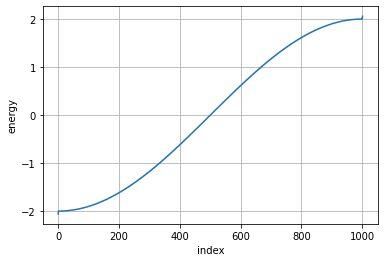

In [154]:
fig, ax = plt.subplots()
ax.plot(energy_numerical)
ax.set_xlabel('index')
ax.set_ylabel('energy')
ax.grid('both')

In [155]:
# analytical BOC
energy_boc = np.sqrt(2 * params['t']**2 + np.sqrt(4 * params['t']**2 + params['g']**2))
print('analytical energy_boc : {}'.format(energy_boc))
print('numerical boc : {}, {}'.format(energy_numerical[0],energy_numerical[-1]))
print('band top, bottm : {}, {}'.format(energy_numerical[1],energy_numerical[-2]))

analytical energy_boc : 2.0581710272714924
numerical boc : -2.058171027271482, 2.0581710272714817
band top, bottm : -1.9999899907746803, 1.9999901501133255


# pure SSH model

In [ ]:
# check delta 
num_points = 6
delta_list = np.zeros(num_points)
energy_list = np.zeros([num_points,params['N']])
for point in range(num_points):
    delta_list[point] = 0.5 - 0.2 * point
    params['delta'] = delta_list[point]
    params['t_a'] = params['t'] + params['delta']
    params['t_b'] = params['t'] - params['delta']

    H_ssh = np.zeros([params['N'],params['N']])

    # chain
    for i in range(params['N_chain']-1):
        now_site = i 
        neighbor = i + 1
        hopping_strength = 0
        if i % 2 == 0:
            hopping_strength = params['t_a']
        else:
            hopping_strength = params['t_b']
        hopping_term = - hopping_strength * np.outer(site_vect[now_site], site_vect[neighbor])
        H_ssh += hopping_term + hopping_term.transpose()

    energy_numerical_ssh = np.linalg.eigvals(H_ssh)
    energy_numerical_ssh = np.sort(energy_numerical_ssh)
    energy_list[point] = energy_numerical_ssh

In [ ]:
fig, ax = plt.subplots()
for point in range(num_points):
    x = np.linspace(1,params['N']+1,params['N'])
    ax.scatter(x,energy_list[point],
               color=cm.tab10(point),
               label='delta : {}'.format(delta_list[point]))
ax.set_xlabel('index')
ax.set_ylabel('energy')
ax.grid('both')

In [ ]:
fig, ax = plt.subplots()
for point in range(num_points):
    for i in range(params['N']):
        ax.scatter(delta_list[point],energy_list[point][i],
                   color=cm.tab10(point))
ax.set_xlabel('delta')
ax.set_ylabel('energy')
ax.grid('both')